In [1]:
import json
import pandas as pd

business=[]
with open('../Data/raw/yelp_academic_dataset_business.json',encoding='utf-8') as f:
    for line in f:
        r=json.loads(line)
        catr = r['categories']
        if(catr!=None):
            cat_list=catr.split(', ')
            if('Restaurants' in cat_list or 'Food' in cat_list or 'Bar' in cat_list):
                r['categories']=cat_list
                business.append(r)
    
businessdf = pd.DataFrame(business)
print(businessdf.shape)
print(businessdf.head(1))
   

(72624, 15)
             address                                         attributes  \
0  1314 44 Avenue NE  {'BikeParking': 'False', 'BusinessAcceptsCredi...   

              business_id                                         categories  \
0  Apn5Q_b6Nz61Tq4XzPdf9A  [Tours, Breweries, Pizza, Restaurants, Food, H...   

      city                                              hours  is_open  \
0  Calgary  {'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...        1   

    latitude   longitude                  name neighborhood postal_code  \
0  51.091813 -114.031675  Minhas Micro Brewery                  T2E 6L6   

   review_count  stars state  
0            24    4.0    AB  


In [2]:
businessdf.city.value_counts()

Toronto                    9674
Las Vegas                  7971
Phoenix                    4996
Montréal                   4251
Calgary                    3565
Charlotte                  3354
Pittsburgh                 3009
Scottsdale                 1954
Cleveland                  1774
Mississauga                1678
Mesa                       1529
Madison                    1424
Tempe                      1304
Henderson                  1137
Chandler                   1102
Markham                    1018
Glendale                    892
Gilbert                     753
Scarborough                 652
Brampton                    594
Richmond Hill               581
North York                  552
Vaughan                     536
Champaign                   491
Peoria                      470
North Las Vegas             467
Concord                     417
Oakville                    407
Etobicoke                   390
Surprise                    302
                           ... 
Sainte-A

In [3]:

vdf=businessdf.loc[businessdf['city'] == 'Las Vegas']
print(vdf.shape)
print(vdf.head(1))


(7971, 15)
                                  address  \
13  3940 Martin Luther King Blvd, Ste 101   

                                           attributes             business_id  \
13  {'BikeParking': 'True', 'BusinessAcceptsCredit...  vJIuDBdu01vCA8y1fwR1OQ   

                                           categories       city  \
13  [American (Traditional), Food, Bakeries, Resta...  Las Vegas   

                                                hours  is_open   latitude  \
13  {'Tuesday': '11:0-18:0', 'Wednesday': '11:0-18...        0  36.192284   

     longitude        name neighborhood postal_code  review_count  stars state  
13 -115.159272  CakesbyToi                    89106             3    1.5    NV  


Star ratings
Mean  3.5
SD  0.83
Counter({4.0: 1925, 3.5: 1809, 3.0: 1269, 4.5: 1080, 2.5: 840, 2.0: 478, 5.0: 376, 1.5: 152, 1.0: 42})


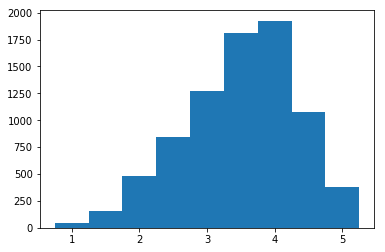

After normalization 
Mean  -1.230145496611389e-16
SD  0.9999999999999999


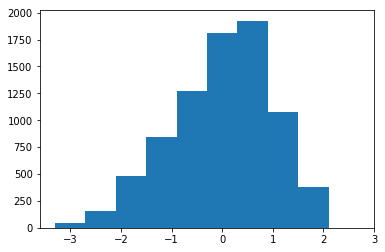

In [7]:
import matplotlib.pyplot as plt
import collections
import numpy as np

vegas_stars = vdf['stars'].values.tolist()

mean=np.mean(vegas_stars)
std=np.std(vegas_stars)

print("Star ratings")
print("Mean ",round(mean,2))
print("SD ",round(std,2))

print(collections.Counter(vegas_stars))


d = np.diff(np.unique(vegas_stars)).min()
left_of_first_bin = np.min(vegas_stars) - float(d)/2
right_of_last_bin = np.max(vegas_stars) + float(d)/2
plt.hist(vegas_stars, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

nstars=[]
for i in range(0,len(vegas_stars)):
    #print(i)
    nstars.append((vegas_stars[i]-mean)/std)

print("After normalization ")
print("Mean ",np.mean(nstars))
print("SD ",np.std(nstars))

d = np.diff(np.unique(nstars)).min()
left_of_first_bin = np.min(nstars) - float(d)/2
right_of_last_bin = np.max(nstars) + float(d)/2
plt.hist(nstars, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

Price ratings
1.6184947958366693
0.6581667186840061


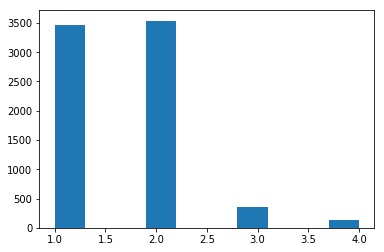

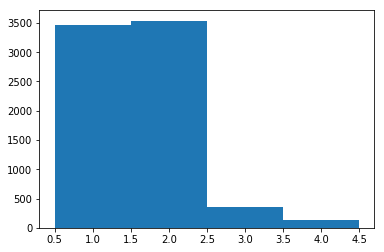

after normalzation
Mean  1.1377786000962372e-17
SD  1.0


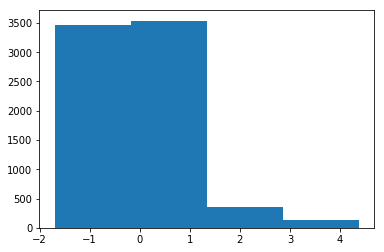

In [15]:
price=[]
for i,j in vdf.iterrows():
     if(j['attributes'] is not None and 'RestaurantsPriceRange2' in j['attributes'].keys()):
        price.append(int(j['attributes']['RestaurantsPriceRange2']))
       
    
print("Price ratings")
print(np.mean(price))
print(np.std(price))
pmean=np.mean(price)
pstd=np.std(price)
plt.hist(price)
plt.show()
d = np.diff(np.unique(price)).min()
left_of_first_bin = np.min(price) - float(d)/2
right_of_last_bin = np.max(price) + float(d)/2
plt.hist(price, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

nprice=[]
for i in range(0,len(price)):
    #print(i)
    nprice.append((price[i]-pmean)/pstd)

print("after normalzation")
print("Mean ",np.mean(nprice))
print("SD ",np.std(nprice))
d = np.diff(np.unique(nprice)).min()
left_of_first_bin = np.min(nprice) - float(d)/2
right_of_last_bin = np.max(nprice) + float(d)/2
plt.hist(nprice, np.arange(left_of_first_bin, right_of_last_bin +d, d))
plt.show()

In [17]:
#Removing rows with only 'Food'/'Restaurants'/'Grocery' categories
def cleanCategories(l):
    if('Restaurants' in l):
        l.remove('Restaurants')
    if('Food' in l):
        l.remove('Food')
    if('Grocery' in l):
        l.remove('Grocery')
    
vdf['categories'].apply(cleanCategories)
vdf=vdf[vdf.astype(str)['categories'] != '[]']
print(vdf.shape)


(7896, 15)
